In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the datasets
file1 = "Unemployment in India.csv"
file2 = "Unemployment_Rate_upto_11_2020.csv"

In [6]:
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

In [8]:
# Display first few rows of both datasets
df1.head(), df2.head()

(           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
 0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
 1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
 2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
 3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
 4  Andhra Pradesh   30-09-2019    Monthly                              5.17   
 
     Estimated Employed   Estimated Labour Participation Rate (%)   Area  
 0           11999139.0                                     43.24  Rural  
 1           11755881.0                                     42.05  Rural  
 2           12086707.0                                     43.50  Rural  
 3           12285693.0                                     43.97  Rural  
 4           12256762.0                                     44.68  Rural  ,
            Region         Date  Frequency   Estimated Unemployment

In [9]:
# Summary of data
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                  

In [11]:
# Check for missing values
df1.isnull().sum(), df2.isnull().sum()

(Region                                      28
  Date                                       28
  Frequency                                  28
  Estimated Unemployment Rate (%)            28
  Estimated Employed                         28
  Estimated Labour Participation Rate (%)    28
 Area                                        28
 dtype: int64,
 Region                                      0
  Date                                       0
  Frequency                                  0
  Estimated Unemployment Rate (%)            0
  Estimated Employed                         0
  Estimated Labour Participation Rate (%)    0
 Region.1                                    0
 longitude                                   0
 latitude                                    0
 dtype: int64)

In [12]:
# Check for duplicate entries
df1.duplicated().sum(), df2.duplicated().sum()

(np.int64(27), np.int64(0))

In [13]:
# Describe the numerical columns
df1.describe(), df2.describe()

(       Estimated Unemployment Rate (%)  Estimated Employed  \
 count                       740.000000        7.400000e+02   
 mean                         11.787946        7.204460e+06   
 std                          10.721298        8.087988e+06   
 min                           0.000000        4.942000e+04   
 25%                           4.657500        1.190404e+06   
 50%                           8.350000        4.744178e+06   
 75%                          15.887500        1.127549e+07   
 max                          76.740000        4.577751e+07   
 
        Estimated Labour Participation Rate (%)  
 count                               740.000000  
 mean                                 42.630122  
 std                                   8.111094  
 min                                  13.330000  
 25%                                  38.062500  
 50%                                  41.160000  
 75%                                  45.505000  
 max                           

In [14]:
# Fix column names by stripping spaces
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

In [15]:
# Drop duplicates
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()

In [17]:
# Remove leading and trailing spaces from the 'Date' column
df1['Date'] = df1['Date'].str.strip()
df2['Date'] = df2['Date'].str.strip()

In [18]:
# Convert 'Date' to datetime (with error handling)
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y', errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y', errors='coerce')

In [19]:
# Check if any dates failed to convert
print(df1['Date'].isna().sum(), "dates couldn't be converted in df1")
print(df2['Date'].isna().sum(), "dates couldn't be converted in df2")

1 dates couldn't be converted in df1
0 dates couldn't be converted in df2


In [20]:
# Find rows where 'Date' conversion failed (NaT values)
df1[df1['Date'].isna()]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
359,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [21]:
df1 = df1.dropna(subset=['Date'])

In [22]:
print(df1['Date'].isna().sum(), "dates couldn't be converted in df1")

0 dates couldn't be converted in df1


In [24]:
# Verify changes
df1.info(), df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                     

(None, None)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

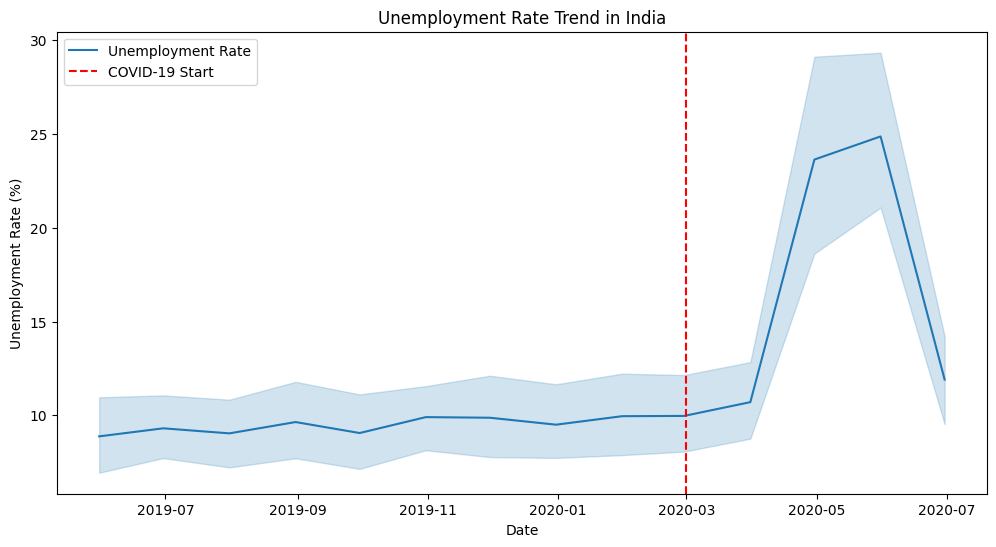

In [26]:
# Unemployment Rate Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x='Date', y='Estimated Unemployment Rate (%)', label="Unemployment Rate")
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label="COVID-19 Start")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Trend in India")
plt.legend()
plt.show()

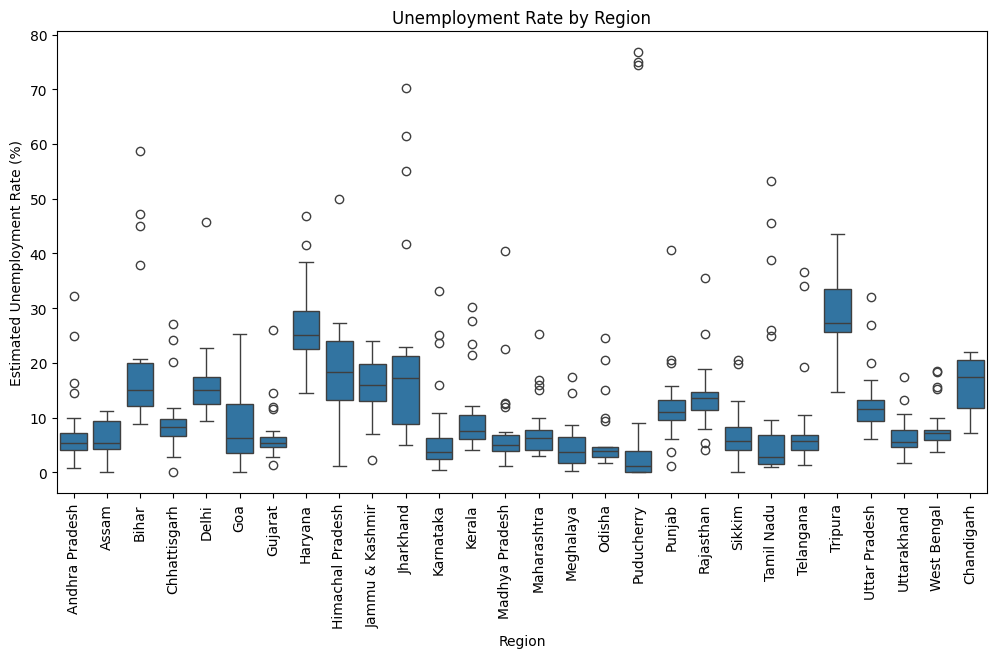

In [28]:
# Unemployment Rate by Region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='Region', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region")
plt.show()

In [29]:
df1.set_index('Date', inplace=True)

In [30]:
# Rolling Average
df1['Rolling_Mean'] = df1['Estimated Unemployment Rate (%)'].rolling(window=3).mean()

In [32]:
df1.index.duplicated().sum()

np.int64(726)

In [33]:
df1 = df1.reset_index(drop=True)

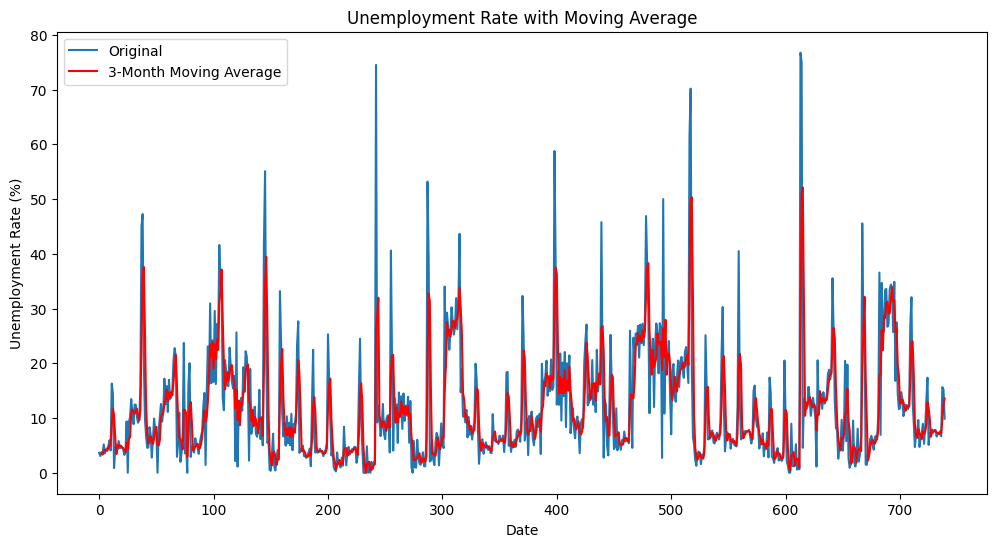

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, y='Estimated Unemployment Rate (%)', x=df1.index, label="Original")
sns.lineplot(data=df1, y='Rolling_Mean', x=df1.index, label="3-Month Moving Average", color="red")
plt.title("Unemployment Rate with Moving Average")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()